In [24]:
#importing the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [37]:
#load the data
data = pd.read_csv(r"C:\Users\INDIAN\Downloads\banknifty_data.csv")
# showing data
data

,Unnamed: 0,time,open,high,low,close,weekday,range_HL,range_OC,type
0,0,2000-01-03 09:15:00+05:30,1054.8101,1054.8101,1054.8101,1054.8101,0,0.000,0.000,Tie
1,1,2000-01-04 09:15:00+05:30,1092.0800,1092.0800,1092.0800,1092.0800,1,0.000,0.000,Tie
2,2,2000-01-05 09:15:00+05:30,1055.9900,1055.9900,1055.9900,1055.9900,2,0.000,0.000,Tie
3,3,2000-01-06 09:15:00+05:30,1086.6700,1086.6700,1086.6700,1086.6700,3,0.000,0.000,Tie
4,4,2000-01-07 09:15:00+05:30,1126.9900,1126.9900,1126.9900,1126.9900,4,0.000,0.000,Tie
...,...,...,...,...,...,...,...,...,...,...
5564,5564,2022-06-13 09:15:00+05:30,33728.6480,33774.0510,33210.3520,33405.8520,0,563.699,322.796,bear
5565,5565,2022-06-14 09:15:00+05:30,33180.6020,33618.1480,33123.8980,33311.3520,1,494.250,130.750,bull
5566,5566,2022-06-15 09:15:00+05:30,33317.8010,33554.5510,33249.5510,33339.0000,2,305.000,21.199,bull
5567,5567,2022-06-16 09:15:00+05:30,33648.8010,33756.5000,32537.9490,32617.1000,3,1218.551,1031.701,bear


<AxesSubplot:>

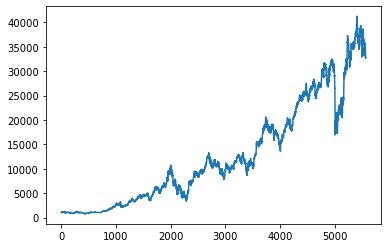

In [46]:
# show the visually
data['close'].plot()

In [47]:
#split the data training and testing datat sets
train_data = data.iloc[:int(.99*len(data)),:]
test_data = data.iloc[:int(.99*len(data)):, :]

In [50]:
#Define the features and target variable 
features = ['open']
target = 'close'

In [51]:
#Create and train the model 
model =xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
#Make and show predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[ 1052.4932  1084.319   1053.6637 ... 35543.203  35495.67   35479.637 ]


In [53]:
#Show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
0        1054.8101
1        1092.0800
2        1055.9900
3        1086.6700
4        1126.9900
           ...    
5508    36348.5510
5509    36147.3520
5510    35527.1020
5511    35410.1020
5512    35710.5000
Name: close, Length: 5513, dtype: float64


In [54]:
#show the models accuracy
accuracy = model.score(test_data[fatures],test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.9998143929301779


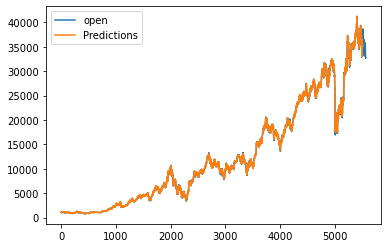

In [55]:
#plot the predictions and the close price
plt.plot(data['close'],label = 'open')
plt.plot(test_data[target].index,predictions,label='Predictions')
plt.legend()
plt.show()